# Enoncé

Tester les codes vus en cours (dans les Numerical Tours, en particulier Ridge et/ou Lasso et/ou multilayer perceptron et/ou SGD) sur votre propre jeu de données, pour un problème de régression ou de classification. 
Ecrire un petit rapport résumant vos observations sur les résultats obtenus, en prenant un soin particulier pour le choix des paramètres (typiquement par validation croisée).

# Chargement des librairies et des données

In [1]:
# coding: utf-8
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing

import warnings
warnings.filterwarnings(action='ignore')

seed = 42

In [2]:
names = ['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','gePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

In [3]:
raw_data = pd.read_csv('communities.data', delimiter=',', header=None, names=names, na_values='?')

In [4]:
raw_data.head(10)

state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   
5      6     NaN        NaN    SouthPasadenacity     1        0.02   
6     44     7.0    41500.0          Lincolntown     1        0.01   
7      6     NaN        NaN            Selmacity     1        0.01   
8     21     NaN        NaN        Hendersoncity     1        0.03   
9     29     NaN        NaN          Claytoncity     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   
5           0.28          0.06          0.54          1.00  ...      0.01   
6           0.39          0.00          0.98          0.06  ...      0.05   
7           0.74          0.03          0.46          0.20  ...      0.01   
8           0.34          0.20          0.84          0.02  ...      0.04   
9           0.40          0.06          0.87          0.30  ...      0.00   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45        NaN            NaN                  NaN   
2     0.21            0.02        NaN            NaN                  NaN   
3     0.39            0.28        NaN            NaN                  NaN   
4     0.09            0.02        NaN            NaN                  NaN   
5     0.58            0.10        NaN            NaN                  NaN   
6     0.08            0.06        NaN            NaN                  NaN   
7     0.33            0.00        NaN            NaN                  NaN   
8     0.17            0.04        NaN            NaN                  NaN   
9     0.47            0.11        NaN            NaN                  NaN   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                  NaN                 0.00              NaN   
2                  NaN                 0.00              NaN   
3                  NaN                 0.00              NaN   
4                  NaN                 0.00              NaN   
5                  NaN                 0.00              NaN   
6                  NaN                 0.00              NaN   
7                  NaN                 0.00              NaN   
8                  NaN                 0.00              NaN   
9                  NaN                 0.00              NaN   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  
5                 0.14  
6                 0.03  
7                 0.55  
8                 0.53  
9                 0.15  

[10 rows x 128 columns]

In [5]:
raw_data.isna().sum().sort_values(axis=0, ascending = False).head(30)

LemasSwFTFieldOps       1675
PctPolicAsian           1675
PolicBudgPerPop         1675
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
RacialMatchCommPol      1675
PctPolicMinor           1675
PolicCars               1675
LemasGangUnitDeploy     1675
OfficAssgnDrugUnits     1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
PolicAveOTWorked        1675
NumKindsDrugsSeiz       1675
community               1177
county                  1174
OtherPerCap                1
AsianPerCap                0
PctEmplProfServ            0
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
dtype: int64

In [6]:
raw_data.isna().sum().value_counts()

0       103
1675     22
1177      1
1174      1
1         1
dtype: int64

Nous avons donc 24 colonnes qui présentent de très nombreuses données manquantes et 1 colonne (OtherPerCap) qui ne présente qu'une donnée manquante. 
Pour faciliter notre étude, nous allons retirer les colonnes qui présentent trop de données manquantes, et retirer l'observation pour laquelle il y a 1 donnée manquante dans OtherPerCap.

In [7]:
data = raw_data[np.logical_not(raw_data['OtherPerCap'].isnull())]
data = data.loc[:,~data.isnull().any()]
data = data.drop('communityname', axis=1) #on retire la variable texte
data.head(10)

state  fold  population  householdsize  racepctblack  racePctWhite  \
0      8     1        0.19           0.33          0.02          0.90   
1     53     1        0.00           0.16          0.12          0.74   
2     24     1        0.00           0.42          0.49          0.56   
3     34     1        0.04           0.77          1.00          0.08   
4     42     1        0.01           0.55          0.02          0.95   
5      6     1        0.02           0.28          0.06          0.54   
6     44     1        0.01           0.39          0.00          0.98   
7      6     1        0.01           0.74          0.03          0.46   
8     21     1        0.03           0.34          0.20          0.84   
9     29     1        0.01           0.40          0.06          0.87   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  PctForeignBorn  \
0          0.12         0.17         0.34         0.47  ...            0.12   
1          0.45         0.07         0.26         0.59  ...            0.21   
2          0.17         0.04         0.39         0.47  ...            0.14   
3          0.12         0.10         0.51         0.50  ...            0.19   
4          0.09         0.05         0.38         0.38  ...            0.11   
5          1.00         0.25         0.31         0.48  ...            0.70   
6          0.06         0.02         0.30         0.37  ...            0.15   
7          0.20         1.00         0.52         0.55  ...            0.59   
8          0.02         0.00         0.38         0.45  ...            0.01   
9          0.30         0.03         0.90         0.82  ...            0.22   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0              0.42            0.50           0.51            0.64      0.12   
1              0.50            0.34           0.60            0.52      0.02   
2              0.49            0.54           0.67            0.56      0.01   
3              0.30            0.73           0.64            0.65      0.02   
4              0.72            0.64           0.61            0.53      0.04   
5              0.42            0.49           0.73            0.64      0.01   
6              0.81            0.77           0.91            0.84      0.05   
7              0.58            0.52           0.79            0.78      0.01   
8              0.78            0.48           0.79            0.75      0.04   
9              0.42            0.34           0.23            0.09      0.00   

   PopDens  PctUsePubTrans  LemasPctOfficDrugUn  ViolentCrimesPerPop  
0     0.26            0.20                 0.32                 0.20  
1     0.12            0.45                 0.00                 0.67  
2     0.21            0.02                 0.00                 0.43  
3     0.39            0.28                 0.00                 0.12  
4     0.09            0.02                 0.00                 0.03  
5     0.58            0.10                 0.00                 0.14  
6     0.08            0.06                 0.00                 0.03  
7     0.33            0.00                 0.00                 0.55  
8     0.17            0.04                 0.00                 0.53  
9     0.47            0.11                 0.00                 0.15  

[10 rows x 103 columns]

On récupère nos variables explicatives pour la régression, qu'on place dans une matrice X et notre variable expliquée y à part.

In [9]:
X = data.as_matrix(data.columns[:-1])
y_m = data.as_matrix([data.columns[-1]])
y = y_m.flatten()

In [51]:
[n,p] = X.shape
print(n,p)

1993 102


In [10]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                    test_size=0.3, # 30% des données dans le jeu de test
                                     random_state = seed
                                    )

In [11]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [ ]:
m_train = y_train.mean()
y_train_std = y_train- m_train
y_test_std = y_test - m_train

# Baseline : régression linéaire classique

In [39]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train_std,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test_std) - y_test) ** 2)

print(baseline_error)

0.018588204935058392


In [49]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train_std,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test_std) - y_test_std) ** 2)

print('Baseline error :', baseline_error)


E = np.linalg.norm(X_test_std.dot(lr.coef_)-y_test_std) / np.linalg.norm(y_test_std)
print('Relative prediction error: ' + str(E))




Baseline error : 0.07234123746964062
Relative prediction error: 0.5839318685808069


In [44]:
lr.coef_

array([-0.01433215, -0.00232256,  0.01581298, -0.00431417,  0.0506334 ,
       -0.02734291, -0.006466  ,  0.00435791,  0.01693091, -0.01574122,
       -0.03136197,  0.01090378, -0.03175955,  0.02046752, -0.04618967,
       -0.05090748,  0.00690235, -0.02176653, -0.00275454, -0.00886184,
       -0.01949598,  0.06239783,  0.01104478, -0.06885054, -0.00994691,
       -0.00383974,  0.0028267 ,  0.00891571,  0.00679516,  0.00511365,
       -0.04456133, -0.00981866,  0.00126736,  0.01292885,  0.0093336 ,
        0.04367296, -0.0163954 , -0.00676772,  0.01726844,  0.02322655,
        0.09036095,  0.04333923,  0.03796251, -0.10921883, -0.05581675,
       -0.01624044, -0.01960307, -0.01533584, -0.00236731,  0.00765438,
       -0.03383347, -0.00483362,  0.02468357, -0.01134896,  0.0085327 ,
       -0.00102267, -0.00835834,  0.00490604, -0.00169495, -0.06406582,
        0.1320076 , -0.08008373,  0.01051009, -0.0248354 ,  0.02507341,
       -0.04850276,  0.12254729, -0.0042482 , -0.04554425, -0.12

In [45]:
w

array([-0.01433215, -0.00232256,  0.01581298, -0.00431417,  0.0506334 ,
       -0.02734291, -0.006466  ,  0.00435791,  0.01693091, -0.01574122,
       -0.03136197,  0.01090378, -0.03175955,  0.02046752, -0.04618967,
       -0.05090748,  0.00690235, -0.02176653, -0.00275454, -0.00886184,
       -0.01949598,  0.06239783,  0.01104478, -0.06885054, -0.00994691,
       -0.00383974,  0.0028267 ,  0.00891571,  0.00679516,  0.00511365,
       -0.04456133, -0.00981866,  0.00126736,  0.01292885,  0.0093336 ,
        0.04367296, -0.0163954 , -0.00676772,  0.01726844,  0.02322655,
        0.09036095,  0.04333923,  0.03796251, -0.10921883, -0.05581675,
       -0.01624044, -0.01960307, -0.01533584, -0.00236731,  0.00765438,
       -0.03383347, -0.00483362,  0.02468357, -0.01134896,  0.0085327 ,
       -0.00102267, -0.00835834,  0.00490604, -0.00169495, -0.06406582,
        0.1320076 , -0.08008373,  0.01051009, -0.0248354 ,  0.02507341,
       -0.04850276,  0.12254729, -0.0042482 , -0.04554425, -0.12

# Régression ridge

In [13]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [14]:
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

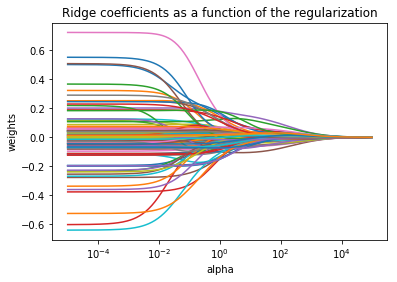

In [15]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

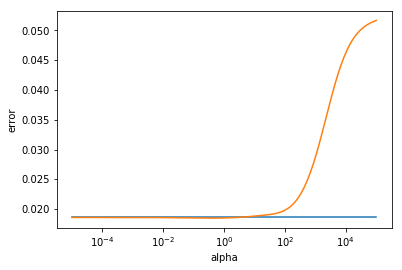

In [16]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

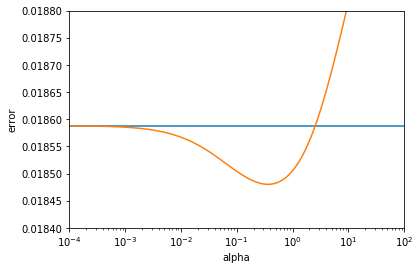

In [17]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.ylim(0.0184, 0.0188)
plt.xlim(1e-4, 1e2)
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

In [18]:
min(errors)

[0.01858820493505837, 0.018480345854644257]

La première valeur correspond à l'erreur avec la régression linéaire classique et la seconde valeur correspond à l'erreur avec la régression Ridge.

# Régression Lasso

In [19]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

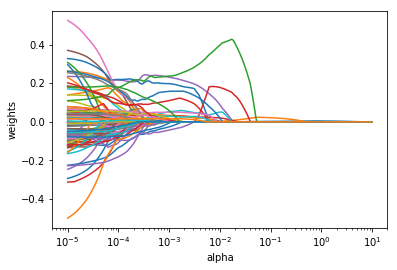

In [20]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.

On peut observer maintenant le comportement de l'erreur.


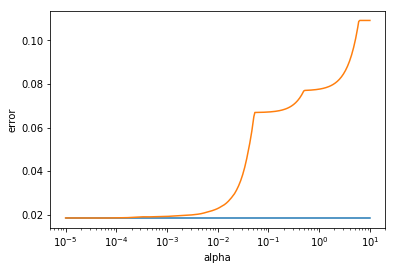

In [21]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

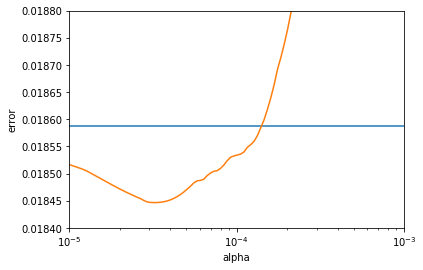

In [22]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.ylim(0.0184, 0.0188)
plt.xlim(1e-5, 1e-3)
plt.xlabel('alpha')
plt.ylabel('error')
#plt.axis('tight')
plt.show()

In [23]:
min(errors)

[0.01858820493505837, 0.018446782360129824]

####################################################


In [24]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [25]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

In [30]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [31]:
X_train_std

array([[ 0.80886966, -0.86967667, -0.37695344, ..., -0.55762153,
        -0.44254596, -0.39992849],
       [-1.38688355, -0.86967667, -0.15510699, ...,  0.42785011,
        -0.04851968, -0.39992849],
       [ 1.17482853, -0.52215477,  6.94397966, ...,  0.08293503,
         0.91465565,  1.03795873],
       ...,
       [-1.50886984, -0.17463287, -0.45090226, ..., -0.01561213,
        -0.66144944, -0.39992849],
       [-1.20390411,  0.86793283, -0.30300462, ..., -0.85326303,
        -0.53010735, -0.39992849],
       [ 0.3209245 ,  0.17288903, -0.37695344, ...,  0.03366145,
         2.27185727, -0.39992849]])

In [32]:
X_test_std

array([[-0.2280138 , -0.17463287,  0.06673947, ...,  2.15242548,
         3.67283957,  0.79146378],
       [-0.59397267,  1.21545473, -0.30300462, ..., -0.45907437,
        -0.57388805, -0.39992849],
       [-1.02092468, -0.86967667, -0.45090226, ..., -0.80398945,
        -0.70523014, -0.39992849],
       ...,
       [-1.26489726, -0.17463287, -0.45090226, ..., -0.50834795,
         0.12660311, -0.39992849],
       [ 1.5407874 , -0.17463287, -0.30300462, ..., -0.6561687 ,
        -0.48632665, -0.39992849],
       [ 0.80886966, -0.17463287, -0.2290558 , ..., -0.01561213,
         0.78331356, -0.39992849]])

In [34]:
mX_train = X_train.mean(axis=0)
sX_train = X_train.std(axis=0)
X_train_std = (X_train-mX_train)/sX_train
X_test_std = (X_test-mX_train)/sX_train

In [35]:
X_train_std

array([[ 0.80886966, -0.86967667, -0.37695344, ..., -0.55762153,
        -0.44254596, -0.39992849],
       [-1.38688355, -0.86967667, -0.15510699, ...,  0.42785011,
        -0.04851968, -0.39992849],
       [ 1.17482853, -0.52215477,  6.94397966, ...,  0.08293503,
         0.91465565,  1.03795873],
       ...,
       [-1.50886984, -0.17463287, -0.45090226, ..., -0.01561213,
        -0.66144944, -0.39992849],
       [-1.20390411,  0.86793283, -0.30300462, ..., -0.85326303,
        -0.53010735, -0.39992849],
       [ 0.3209245 ,  0.17288903, -0.37695344, ...,  0.03366145,
         2.27185727, -0.39992849]])

In [36]:
X_test_std

array([[-0.2280138 , -0.17463287,  0.06673947, ...,  2.15242548,
         3.67283957,  0.79146378],
       [-0.59397267,  1.21545473, -0.30300462, ..., -0.45907437,
        -0.57388805, -0.39992849],
       [-1.02092468, -0.86967667, -0.45090226, ..., -0.80398945,
        -0.70523014, -0.39992849],
       ...,
       [-1.26489726, -0.17463287, -0.45090226, ..., -0.50834795,
         0.12660311, -0.39992849],
       [ 1.5407874 , -0.17463287, -0.30300462, ..., -0.6561687 ,
        -0.48632665, -0.39992849],
       [ 0.80886966, -0.17463287, -0.2290558 , ..., -0.01561213,
         0.78331356, -0.39992849]])

In [37]:
m_train = y_train.mean()
y_train_std = y_train- m_train
y_test_std = y_test - m_train

In [38]:
w = np.linalg.solve(X_train_std.transpose().dot(X_train_std), X_train_std.transpose().dot(y_train_std) )

E = np.linalg.norm(X_test_std.dot(w)-y_test_std) / np.linalg.norm(y_test_std)
print(( 'Relative prediction error: ' + str(E) ) );

Relative prediction error: 0.5839318685808053


In [42]:
w

array([-0.01433215, -0.00232256,  0.01581298, -0.00431417,  0.0506334 ,
       -0.02734291, -0.006466  ,  0.00435791,  0.01693091, -0.01574122,
       -0.03136197,  0.01090378, -0.03175955,  0.02046752, -0.04618967,
       -0.05090748,  0.00690235, -0.02176653, -0.00275454, -0.00886184,
       -0.01949598,  0.06239783,  0.01104478, -0.06885054, -0.00994691,
       -0.00383974,  0.0028267 ,  0.00891571,  0.00679516,  0.00511365,
       -0.04456133, -0.00981866,  0.00126736,  0.01292885,  0.0093336 ,
        0.04367296, -0.0163954 , -0.00676772,  0.01726844,  0.02322655,
        0.09036095,  0.04333923,  0.03796251, -0.10921883, -0.05581675,
       -0.01624044, -0.01960307, -0.01533584, -0.00236731,  0.00765438,
       -0.03383347, -0.00483362,  0.02468357, -0.01134896,  0.0085327 ,
       -0.00102267, -0.00835834,  0.00490604, -0.00169495, -0.06406582,
        0.1320076 , -0.08008373,  0.01051009, -0.0248354 ,  0.02507341,
       -0.04850276,  0.12254729, -0.0042482 , -0.04554425, -0.12

In [ ]:
Lambda = .2*np.linalg.norm(X_train_std)**2;
w = np.linalg.solve( X_train_std.transpose().dot(X_train_std) + Lambda*np.eye(p), X_train_std.transpose().dot(y_train_std) )
u = np.linalg.solve( X_train_std.dot(X_train_std.transpose()) + Lambda*np.eye(n0), y_train_std )
w1 = X_train_std.transpose().dot( u )
print( ('Error (should be 0): ' + str( np.linalg.norm(w-w1)/np.linalg.norm(w) ) ) )